### Aplicação do modelo de regrassão logistica com a biblioteca statsmodels no conjunto de dados do Titanic
https://www.kaggle.com/c/titanic

In [2]:
import pandas as pd
import numpy as np
import patsy
import statsmodels.api as sm
import pylab as plt

In [3]:
df = pd.read_csv("train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# As variaveis ticket, cabin e name serão removidas para criação desse algortimo
# Analisadas com mais detalhes, eles podem ser útil para o modelo
df = df.drop(columns = ['Ticket', 'Cabin', 'Name'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [5]:
#Removendo os valores vazios. Que também em um estudo pode ser substituido por valores relevantes para fazer parte do modelo final o que pode obter melhorias
df = df.dropna()

In [6]:
#Criando o modelo
#A variavel 'Survived' é a variavel dependente. As demais são independentes. O valor 'C' indica variaveis categoricas
formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + C(Embarked) + Parch'

In [7]:
#Dividindo os dados em treino e teste sem usar o scikit-learn
df_train = df.iloc[0:600, : ]
df_test = df.iloc[600: , : ]

In [8]:
#Separando as variaveis entre as dependentes e independentes do modelo
y_train, x_train = patsy.dmatrices(formula, data = df_train, return_type = 'dataframe')
y_test, x_test = patsy.dmatrices(formula, data = df_test, return_type = 'dataframe')

In [9]:
#Contrução do modelo
model = sm.Logit(y_train, x_train)
res = model.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.450031
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  600
Model:                          Logit   Df Residuals:                      591
Method:                           MLE   Df Model:                            8
Date:                Fri, 18 Dec 2020   Pseudo R-squ.:                  0.3333
Time:                        00:18:45   Log-Likelihood:                -270.02
converged:                       True   LL-Null:                       -404.99
Covariance Type:            nonrobust   LLR p-value:                 1.009e-53
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.3332      0.510      8.490      0.000       3.333       5.334
C(Pclass)[T.2]      -1.2030      0.325     -3.703      0.000      -1.840      -0.566
C(Pclass)[T.3]      -2.4673      0.320     -7.705      0.000      -3.095      -1.840
C(Sex)[T.male]      -2.6312      0.244    -10.797      0.000      -3.109      -2.154
C(Embarked)[T.Q]    -0.4359      0.647     -0.674      0.501      -1.704       0.832
C(Embarked)[T.S]    -0.2910      0.297     -0.980      0.327      -0.873       0.291
Age                 -0.0397      0.009     -4.464      0.000      -0.057      -0.022
SibSp               -0.3202      0.136     -2.354      0.019      -0.587      -0.054
Parch               -0.1420      0.136     -1.041      0.298      -0.409       0.125
====================================================================================
"""

#### Avaliando o modelo
- O valor do pseudo r é similar ao r^2 da regressão linear, o valor 0.33 não foi muito bom
- Ao analisar a coluna P > |z|, obtemos três variaveis com valores acima de 0.05: Embarked T.Q, Embarked T.S e Parch
- Será criado um novo modelo sem essas variaveis

In [10]:
formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp'
y_train,x_train = patsy.dmatrices(formula, data=df_train, return_type='dataframe')
y_test,x_test = patsy.dmatrices(formula, data=df_test, return_type='dataframe')

In [11]:
#instantiate new model
model2 = sm.Logit(y_train,x_train)
res2 = model2.fit()
res2.summary()

Optimization terminated successfully.
         Current function value: 0.451793
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  600
Model:                          Logit   Df Residuals:                      594
Method:                           MLE   Df Model:                            5
Date:                Fri, 18 Dec 2020   Pseudo R-squ.:                  0.3307
Time:                        00:25:10   Log-Likelihood:                -271.08
converged:                       True   LL-Null:                       -404.99
Covariance Type:            nonrobust   LLR p-value:                 8.172e-56
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.1050      0.479      8.575      0.000       3.167       5.043
C(Pclass)[T.2]    -1.2971      0.306     -4.242      0.000      -1.896      -0.698
C(Pclass)[T.3]    -2.5739      0.305     -8.433      0.000      -3.172      -1.976
C(Sex)[T.male]    -2.5808      0.235    -10.996      0.000      -3.041      -2.121
Age               -0.0401      0.009     -4.549      0.000      -0.057      -0.023
SibSp             -0.3691      0.130     -2.840      0.005      -0.624      -0.114
==================================================================================
"""

#### Avaliando o segundo modelo
- Mesmo retirando as variaveis o valor do pseudo r não modificiou
- Todas as variaveis foram significativas para o modelo

Text(0.5, 1.0, 'Distribuição das previsões')

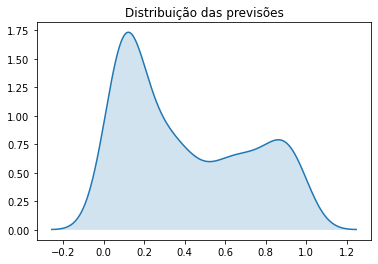

In [14]:
#Validação do modelo
kde_res = sm.nonparametric.KDEUnivariate(res.predict())
kde_res.fit()
plt.plot(kde_res.support,kde_res.density)
plt.fill_between(kde_res.support,kde_res.density, alpha=0.2)
plt.title("Distribuição das previsões")

##### O gráfico acima mostra como está a densidade da predição. Pode-se observar que temos uma grande concentração de valores próximo de 0.0 a 0.2, indicando que temos uma grande parte de não sobreviventes

Text(0.5, 1.0, 'A chance de sobreviver sendo do sexo masculino')

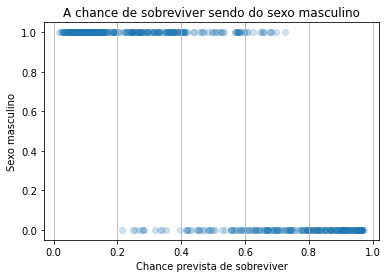

In [16]:
#Predição em relação ao sexo masculino
plt.scatter(res.predict(),x_train['C(Sex)[T.male]'] , alpha=0.2)
plt.grid(b=True, which='major', axis='x')
plt.xlabel("Chance prevista de sobreviver")
plt.ylabel("Sexo masculino")
plt.title("A chance de sobreviver sendo do sexo masculino")

#### Pose-se observar no gráfico acima que tem-se uma maior concentração de próximo ao valor 0 para o sexo masculino de sobreviver

Text(0.5, 1.0, 'A chance de sobreviver sendo da terceira classe')

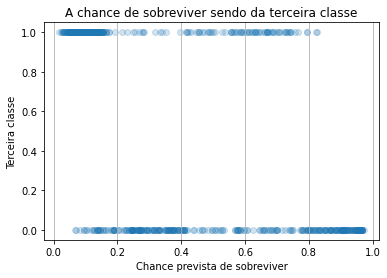

In [17]:
#Predição para chance de sobreviver na terceira classe
plt.scatter(res.predict(),x_train['C(Pclass)[T.3]'] , alpha=0.2)
plt.xlabel("Chance prevista de sobreviver")
plt.ylabel("Terceira classe")
plt.grid(b=True, which='major', axis='x')
plt.title("A chance de sobreviver sendo da terceira classe")

#### Observa-se maior concentração de pontos próximo o percentual 0 da chance prevista de sobreviver. Indicando que, quem estava na terceira classe tinha menos chance de sobreviver 

Text(0, 0.5, 'Idade')

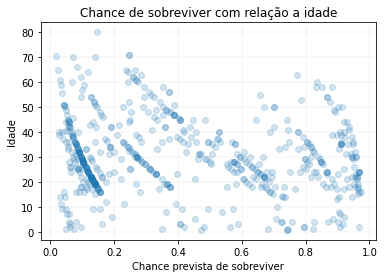

In [18]:
#Distribuição da probabilidade de chance de sobreviver com relação a idade
plt.scatter(res.predict(),x_train.Age , alpha=0.2)
plt.grid(True, linewidth=0.15)
plt.title("Chance de sobreviver com relação a idade")
plt.xlabel("Chance prevista de sobreviver")
plt.ylabel("Idade")

#### Pode-se observar que a medidade que a idade aumenta temos uma maior concentração de pontos no lado esquerdo do gráfico. O que indica que pessoas mais velhas tem menor chance de sobreviver

Text(0, 0.5, 'No. de irmãos/cônjuges')

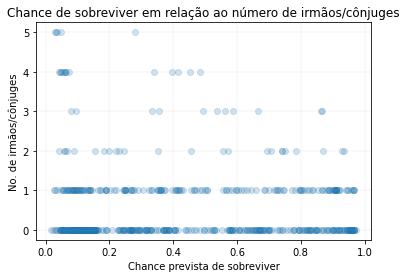

In [20]:
#Distribuição da probabilidade em relação ao número de irmãos/cônjuges
plt.scatter(res.predict(),x_train.SibSp , alpha=0.2)
plt.grid(True, linewidth=0.15)
plt.title("Chance de sobreviver em relação ao número de irmãos/cônjuges")
plt.xlabel("Chance prevista de sobreviver")
plt.ylabel("No. de irmãos/cônjuges")

#### Pode-se ver que pessoas que tinhas entre 4 e 5 irmãos/cônjuges embarcados tinham menos chance de sobreviver. Os demais não é possível afirmar porque está com uma distribuição aleatória

In [25]:
#Validação do modelo com os dados de test
y_pred = res2.predict(x_test)
y_pred_flag = y_pred > 0.7
print(pd.crosstab(y_test.Survived, y_pred_flag, rownames = ['Actual'], colnames = ['Predicted']))

Predicted  False  True 
Actual                 
0.0           67      0
1.0           21     24


In [33]:
import sklearn
print(sklearn.metrics.classification_report(y_test,y_pred_flag))

              precision    recall  f1-score   support

         0.0       0.76      1.00      0.86        67
         1.0       1.00      0.53      0.70        45

    accuracy                           0.81       112
   macro avg       0.88      0.77      0.78       112
weighted avg       0.86      0.81      0.80       112



#### A primeira tabela mostra a matrix de confusão. Já a segunda mostra algumas das métricas que serve para avaliar o modelo.
    • Precisão: Precisão diz que entre todas as previsões de classe 0 ou classe 1, quantos deles foram corretamente previstos. Então, na tabela acima, 76% da previsão de não sobreviver é correto e 100% da previsão daqueles que sobreviveram está correta.
    
    • Recall: Recall diz que, dentre todas as situações de classe Positivo como valor esperado, quantas estão corretas. Então, na tabela acima, todas as pessoas que não sobreviveram foram previstas corretamente, 100% de recall, mas de todos os pessoas que sobreviveram, apenas 53% delas foram previstas corretamente.

#### Quando utiliza-los:
    • A precisão pode ser usada em uma situação em que os Falsos Positivos são considerados mais prejudiciais que os Falsos Negativos. Por exemplo, ao classificar uma ação como um bom investimento, é necessário que o modelo esteja correto, mesmo que acabe classificando bons investimentos como maus investimentos (situação de Falso Negativo) no processo. Ou seja, o modelo deve ser preciso em suas classificações, pois a partir do momento que consideramos um investimento bom quando na verdade ele não é, uma grande perda de dinheiro pode acontecer.

    • O recall pode ser usada em uma situação em que os Falsos Negativos são considerados mais prejudiciais que os Falsos Positivos. Por exemplo, o modelo deve de qualquer maneira encontrar todos os pacientes doentes, mesmo que classifique alguns saudáveis como doentes (situação de Falso Positivo) no processo. Ou seja, o modelo deve ter alto recall, pois classificar pacientes doentes como saudáveis pode ser uma tragédia.

In [36]:
#Cálculo e plot da curva ROC
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.879934


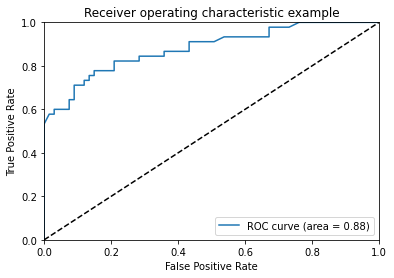

In [37]:
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

#### A linha pontilhada no gráfico anterior tem um AUC de 0.50, o que não é bom. O modelo nos dá um AUC de 0.88, que é muito bom e é representado pela linha azul no gráfico.